In [1]:
from google.colab import files

In [2]:
## files.upload()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/Power Plant Prediction.csv")

In [5]:
df

,AT,EV,AP,RH,PE
0,29.95,73.42,1011.44,66.32,432.81
1,5.76,40.07,1013.22,62.99,494.67
2,29.44,64.33,1011.40,61.78,442.32
3,32.83,74.33,1011.44,50.42,427.36
4,16.86,39.63,1004.47,83.50,466.68
...,...,...,...,...,...
6405,23.39,61.87,1010.35,48.91,444.03
6406,11.63,40.55,1022.89,87.12,474.67
6407,27.79,69.23,1012.86,45.71,435.06
6408,12.26,41.50,1014.87,89.41,471.13


AT:atmospheric tempreture, EV: energy velocity, AP:atmospheric pressure, RH:relative humidity, PE: plant energy

In [26]:
df.isnull().sum()

AT    0
EV    0
AP    0
RH    0
PE    0
dtype: int64

In [7]:
df.duplicated().sum()

14

In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(6396, 5)

## Checking for Outliers

<Axes: xlabel='AT'>

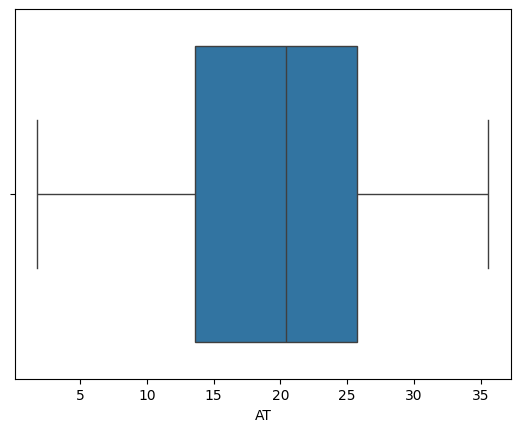

In [10]:
sns.boxplot(x = "AT", data = df)

<Axes: xlabel='EV'>

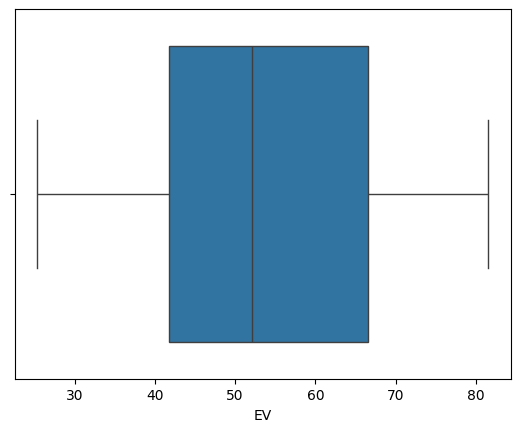

In [11]:
sns.boxplot(x = "EV", data = df)

<Axes: xlabel='AP'>

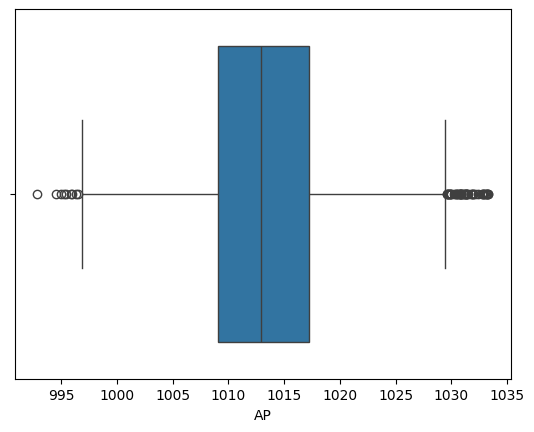

In [12]:
sns.boxplot(x = "AP", data = df)

<Axes: xlabel='RH'>

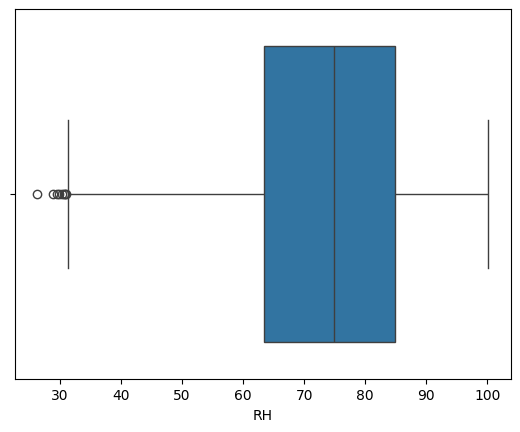

In [13]:
sns.boxplot(x = "RH", data = df)

In [14]:
Lower_lim = df["AP"].quantile(0.05)
Upper_lim = df["AP"].quantile(0.95)
df = df[(df['AP']>Lower_lim) & (df['AP']<Upper_lim)]

<Axes: xlabel='AP'>

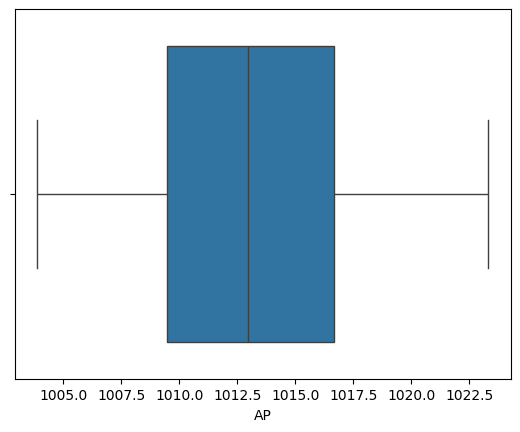

In [15]:
sns.boxplot(x = "AP", data = df)

In [16]:
Lower_lim = df["RH"].quantile(0.05)
Upper_lim = df["RH"].quantile(0.95)
df = df[(df['RH']>Lower_lim) & (df['RH']<Upper_lim)]

<Axes: xlabel='RH'>

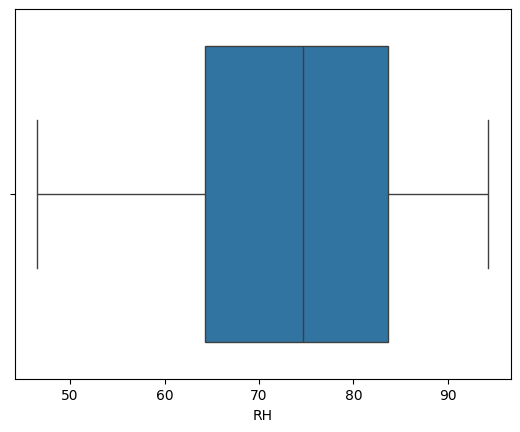

In [17]:
sns.boxplot(x = "RH", data = df)

In [18]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [19]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.15)

In [21]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
lr_pred = lr_model.predict(x_test)
print("rsquared value:", r2_score(lr_pred,y_test))
print("mse value:", mean_squared_error(lr_pred,y_test))
print("rmse value:", np.sqrt(mean_squared_error(lr_pred,y_test)))
print("mae value:", mean_absolute_error(lr_pred,y_test))

rsquared value: 0.9244441523097324
mse value: 19.80232444387285
rmse value: 4.449980274548737
mae value: 3.58267526364513


In [22]:
svm_model = SVR()
svm_model.fit(x_train,y_train)
svm_pred = svm_model.predict(x_test)
print("rsquared value:", r2_score(svm_pred,y_test))
print("mse value:", mean_squared_error(svm_pred,y_test))
print("rmse value:", np.sqrt(mean_squared_error(svm_pred,y_test)))
print("mae value:", mean_absolute_error(svm_pred,y_test))

rsquared value: 0.9355714484323209
mse value: 17.18175157916881
rmse value: 4.145087644328985
mae value: 3.133594372459118


In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)
rf_pred = rf_model.predict(x_test)
print("rsquared value:", r2_score(rf_pred,y_test))
print("mse value:", mean_squared_error(rf_pred,y_test))
print("rmse value:", np.sqrt(mean_squared_error(rf_pred,y_test)))
print("mae value:", mean_absolute_error(rf_pred,y_test))

rsquared value: 0.9549403770549817
mse value: 12.100138520772235
rmse value: 3.4785253370893012
mae value: 2.5245577863577875


In [25]:
df.PE.mean()

453.93333526570046

Cross Validation ::: applying cross validation lr_model

In [27]:
from sklearn.model_selection import KFold, cross_val_score

In [28]:
kf = KFold(n_splits = 10, shuffle = True)
r2_s = cross_val_score(lr_model, x_train, y_train, cv = kf, scoring = "r2")

r2_s.mean()

0.9264792811172816

In [29]:
mae_s = cross_val_score(lr_model, x_train, y_train, cv = kf, scoring = "neg_mean_absolute_error")

mae_s.mean()

-3.603252425953619

In [30]:
-mae_s.mean()

3.603252425953619

In [32]:
mse_s = cross_val_score(lr_model, x_train, y_train, cv = kf, scoring = "neg_mean_squared_error")

mse_s.mean()

-20.28264567909803

In [33]:
-mse_s.mean()

20.28264567909803